## Perceptron : Linear Regression

#### Hemant Thapa

#### 1. Importing Libraries 

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
#seed for reproducibility
random.seed(42)

#### 2. Perceptron 

In [3]:
class PerceptronLinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.losses = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            loss = 0
            for i in range(n_samples):
                prediction = np.dot(X[i], self.weights) + self.bias
                error = y[i] - prediction
                self.weights += self.learning_rate * error * X[i]
                self.bias += self.learning_rate * error
                loss += error ** 2
            self.losses.append(loss / n_samples)

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def mse(self, X, y):
        predictions = self.predict(X)
        return np.mean((predictions - y) ** 2)

    def r_squared(self, X, y):
        predictions = self.predict(X)
        mean_y = np.mean(y)
        ss_total = np.sum((y - mean_y) ** 2)
        ss_res = np.sum((y - predictions) ** 2)
        return 1 - (ss_res / ss_total)

In [4]:
#regression dataset
def generate_regression_data(n_samples=100, n_features=1, noise=0.1):
    X = np.random.rand(n_samples, n_features)
    true_weights = np.random.rand(n_features)
    y = np.dot(X, true_weights) + np.random.normal(scale=noise, size=n_samples)
    return X, y, true_weights

In [5]:
# generate datas
X, y, _ = generate_regression_data(n_samples=200, n_features=1, noise=0.05)

In [6]:
# train the model
model = PerceptronLinearRegression()
model.fit(X, y)

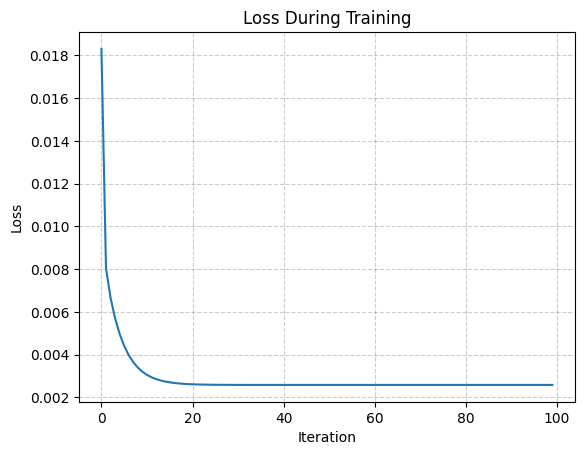

In [7]:
# loss during training
plt.plot(range(model.n_iterations), model.losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss During Training')
plt.grid(True, ls='--', alpha=0.2, color='black')
plt.show()

In [8]:
# mean squared error (MSE) and r-squared value
mse = model.mse(X, y)
r_squared = model.r_squared(X, y)
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r_squared)

Mean Squared Error (MSE): 0.002556175423738155
R-squared: 0.8339006158078921


In [9]:
y_pred = model.predict(X)
y_pred[:5]

array([0.2946466 , 0.38268496, 0.3366024 , 0.17976288, 0.29124104])

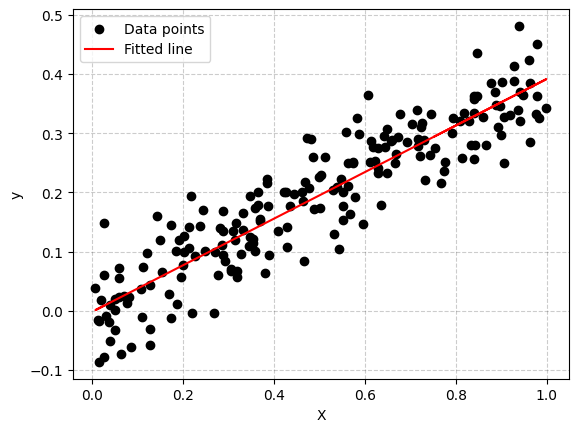

In [10]:
# best fit line
plt.scatter(X, y, color='black', label='Data points')
plt.plot(X, y_pred, color='red', label='Fitted line')
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True, ls='--', alpha=0.2, color='black')
plt.legend()
plt.show()

#### References

1. W3Schools. (n.d.). AI - Perceptrons. Retrieved from [https://www.w3schools.com/ai/ai_perceptrons.asp](https://www.w3schools.com/ai/ai_perceptrons.asp)

2. Towards Data Science. (n.d.). Perceptron Learning Algorithm. Retrieved from [https://towardsdatascience.com/perceptron-learning-algorithm-d5db0deab975](https://towardsdatascience.com/perceptron-learning-algorithm-d5db0deab975)

3. Towards Data Science. (n.d.). What the Hell is Perceptron? Retrieved from [https://towardsdatascience.com/what-the-hell-is-perceptron-626217814f53](https://towardsdatascience.com/what-the-hell-is-perceptron-626217814f53)

4. Medium. (n.d.). Introduction to Perceptrons: Building Your First Neural Network in Python. Retrieved from [https://medium.com/mlearning-ai/introduction-to-perceptrons-building-your-first-neural-network-in-python-c7ae3616f2c1](https://medium.com/mlearning-ai/introduction-to-perceptrons-building-your-first-neural-network-in-python-c7ae3616f2c1)
